In [1]:
import base64
import datetime
import json
import os
import random
import time

import scipy
from scipy import ndimage
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import statsmodels as sm
from pylab import rcParams
from pylab import *
from matplotlib.dates import date2num , DateFormatter
from PIL import Image

np.random.seed(1337)

%matplotlib inline
sns.set(font_scale=1.0)
rcParams['figure.figsize'] = 8, 6
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from sklearn.cluster import *

# Load the Data

In [17]:
d = pd.read_json('tmp/raw_data.json')
d.index.name = 'id'
d = d[['latitude', 'longitude', 'bedrooms', 'price']]
e = pd.read_csv('tmp/features_created.csv', index_col='id')
e = e[['created_hour_of_dataset']]
d = pd.merge(d, e, how='left', left_index=True, right_index=True)
print len(d)
d.head(10)

124011


,latitude,longitude,bedrooms,price,created_hour_of_dataset
id,,,,,
0,40.7185,-73.9865,1,2950,1709.0
1,40.7278,-74.0000,2,2850,2022.0
10,40.7145,-73.9425,3,3000,2023.0
100,40.7306,-73.9890,1,3758,1516.0
1000,40.7109,-73.9571,2,3300,1710.0
10000,40.7947,-73.9667,2,5465,1740.0
100000,40.7650,-73.9845,2,4900,269.0
100001,40.7901,-73.9774,3,9000,150.0
100002,40.7730,-73.9571,2,2800,579.0


In [18]:
d.dtypes

latitude                   float64
longitude                  float64
bedrooms                     int64
price                        int64
created_hour_of_dataset    float64
dtype: object

# Try Different Clustering Algos

In [19]:
colors = {
    0: 'r',
    1: 'g',
    2: 'b',
    3: 'm',
    4: 'y',
    5: 'c',
    6: 'k'}

### K-Means

In [ ]:
e = d.sample(50000)
clustering = sklearn.cluster.KMeans(n_clusters=80)
clustering.fit(e[['longitude', 'latitude']])
_ = plt.figure(figsize=(12,12))
plt.scatter(
    x=e.longitude,
    y=e.latitude,
    c=[colors[(i%7)] for i in clustering.labels_],
    marker='+')
_ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
_ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

### Affinity Propagationm

In [ ]:
e = d.sample(3000)
clustering = sklearn.cluster.AffinityPropagation(damping=0.5)
clustering.fit(e[['longitude', 'latitude']])
_ = plt.figure(figsize=(12,12))
plt.scatter(
    x=e.longitude,
    y=e.latitude,
    c=[colors[(i%7)] for i in clustering.labels_],
    marker='+')
_ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
_ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

### Mean-Shift

In [ ]:
e = d.sample(3000)
clustering = sklearn.cluster.MeanShift()
clustering.fit(e[['longitude', 'latitude']])
_ = plt.figure(figsize=(12,12))
plt.scatter(
    x=e.longitude,
    y=e.latitude,
    c=[colors[(i%7)] for i in clustering.labels_],
    marker='+')
_ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
_ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

### Spectral Clustering

In [ ]:
e = d.sample(2000)
clustering = sklearn.cluster.SpectralClustering(n_clusters=100)
clustering.fit(e[['longitude', 'latitude']])
_ = plt.figure(figsize=(12,12))
plt.scatter(
    x=e.longitude,
    y=e.latitude,
    c=[colors[(i%7)] for i in clustering.labels_],
    marker='+')
_ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
_ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

### Agglomerative Clustering

In [ ]:
e = d.sample(20000)
clustering = sklearn.cluster.AgglomerativeClustering(linkage='average', n_clusters=200)
clustering.fit(e[['longitude', 'latitude']])
_ = plt.figure(figsize=(12,12))
plt.scatter(
    x=e.longitude,
    y=e.latitude,
    c=[colors[(i%7)] for i in clustering.labels_],
    marker='+')
_ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
_ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

### DBSCAN

In [ ]:
e = d.sample(10000)
clustering = sklearn.cluster.DBSCAN(eps=0.0015, n_jobs=4)
clustering.fit(e[['longitude', 'latitude']])
_ = plt.figure(figsize=(12,12))
plt.scatter(
    x=e.longitude,
    y=e.latitude,
    c=[colors[(i%7)] for i in clustering.labels_],
    marker='+')
_ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
_ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

### Birch

In [ ]:
e = d.sample(10000)
clustering = sklearn.cluster.Birch(threshold=0.001, n_clusters=100)
clustering.fit(e[['longitude', 'latitude']])
_ = plt.figure(figsize=(12,12))
plt.scatter(
    x=e.longitude,
    y=e.latitude,
    c=[colors[(i%7)] for i in clustering.labels_],
    marker='+')
_ = plt.xlim((e.longitude.quantile(0.01), e.longitude.quantile(0.99)))
_ = plt.ylim((e.latitude.quantile(0.01), e.latitude.quantile(0.99)))

# K-Means Clustering

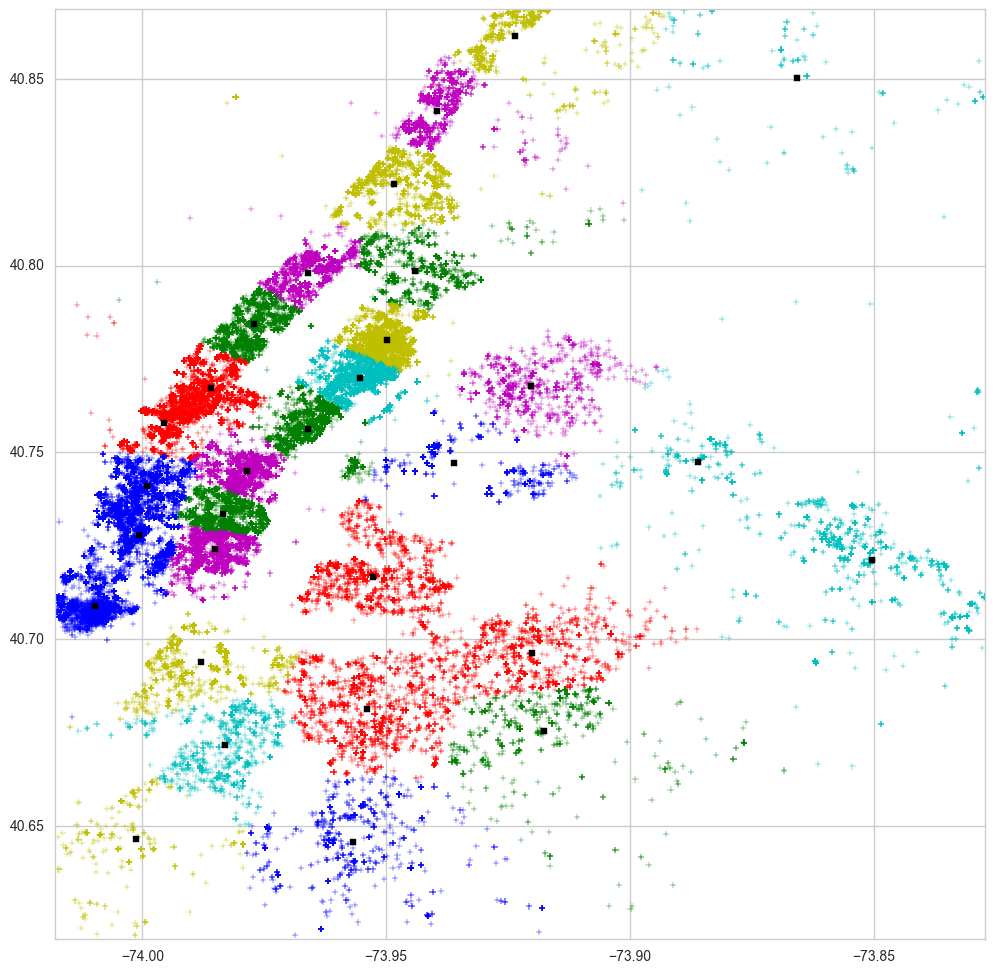

In [20]:
lon_q1 = d.longitude.quantile(0.005)
lon_q99 = d.longitude.quantile(0.995)
lat_q1 = d.latitude.quantile(0.005)
lat_q99 = d.latitude.quantile(0.995)
e = d[((d.longitude >= lon_q1) &
       (d.longitude <= lon_q99) &
       (d.latitude >= lat_q1) &
       (d.latitude <= lat_q99))]#.sample(50000)
clustering = sklearn.cluster.KMeans(n_clusters=30)
clustering.fit(e[['longitude', 'latitude']])
_ = plt.figure(figsize=(12,12))
plt.scatter(
    x=e.longitude,
    y=e.latitude,
    c=[colors[(i%6)] for i in clustering.labels_],
    marker='+')
plt.scatter(
    x=clustering.cluster_centers_[:,0],
    y=clustering.cluster_centers_[:,1],
    c='k',
    marker=',')
_ = plt.xlim((lon_q1, lon_q99))
_ = plt.ylim((lat_q1, lat_q99))

In [21]:
d['cluster_id'] = 30
d.loc[((d.longitude >= lon_q1) &
       (d.longitude <= lon_q99) &
       (d.latitude >= lat_q1) &
       (d.latitude <= lat_q99)), 'cluster_id'] = clustering.labels_

# Cluster Size

In [22]:
d['cluster_size'] = np.nan
for cid in d.cluster_id.unique():
    d.loc[d.cluster_id == cid, 'cluster_size'] = len(d[d.cluster_id == cid])

# Distance from Centroid

In [23]:
centroids = pd.DataFrame(clustering.cluster_centers_)
centroids = pd.concat([centroids,pd.DataFrame({0: [-73.95], 1: [40.75]}, index=[30])])
dc = pd.merge(d, centroids, left_on='cluster_id', right_index=True)
d['distance_cc'] = np.power(
    (np.power((dc.longitude - dc[0]), 2.0) +
    np.power((dc.latitude - dc[1]), 2.0)),
    0.5)

# Price Quantile

In [24]:
d['price_q10_clust_all'] = np.nan
for cid in d.cluster_id.unique():
    noise = np.random.randn(len(d[d.cluster_id == cid]))
    d.loc[(d.cluster_id == cid), 'price_q10_clust_all'] = \
                pd.qcut((d.loc[d.cluster_id == cid, 'price'] + 0.1*noise),
                        10,
                        [0.1 * i for i in range(0, 10)])
d['price_q100_clust_all'] = np.nan
for cid in d.cluster_id.unique():
    noise = np.random.randn(len(d[d.cluster_id == cid]))
    d.loc[(d.cluster_id == cid), 'price_q100_clust_all'] = \
                pd.qcut((d.loc[d.cluster_id == cid, 'price'] + 0.1*noise),
                        100,
                        [0.01 * i for i in range(0, 100)])

In [25]:
d['price_q10_clust'] = np.nan
for cid in d.cluster_id.unique():
    for b in d[d.cluster_id == cid].bedrooms.value_counts().index:
        noise = np.random.randn(len(d[((d.bedrooms == b) & (d.cluster_id == cid))]))
        try:
            d.loc[((d.bedrooms == b) & (d.cluster_id == cid)), 'price_q10_clust'] = \
                pd.qcut((d.loc[((d.bedrooms == b) & (d.cluster_id == cid)), 'price'] + 0.1*noise),
                        10,
                        [0.1 * i for i in range(0, 10)])
        except:
            d.loc[((d.bedrooms == b) & (d.cluster_id == cid)), 'price_q10_clust'] = 0.5
d['price_q100_clust'] = np.nan
for cid in d.cluster_id.unique():
    for b in d[d.cluster_id == cid].bedrooms.value_counts().index:
        noise = np.random.randn(len(d[((d.bedrooms == b) & (d.cluster_id == cid))]))
        try:
            d.loc[((d.bedrooms == b) & (d.cluster_id == cid)), 'price_q100_clust'] = \
                pd.qcut((d.loc[((d.bedrooms == b) & (d.cluster_id == cid)), 'price'] + 0.1*noise),
                        100,
                        [0.01 * i for i in range(0, 100)])
        except:
            d.loc[((d.bedrooms == b) & (d.cluster_id == cid)), 'price_q100_clust'] = 0.5

# Area Related Features

In [28]:
MAX_LATLON_DIFF = 0.01
MAX_TIME_DIFF = 72
def area_features(r):
    a = d[((abs(d.latitude - r['latitude']) <= MAX_LATLON_DIFF) &
                  (abs(d.longitude - r['longitude']) <= MAX_LATLON_DIFF))].copy()
    
    area_apts_all = a
    
    area_apts = a[(a.bedrooms == r['bedrooms'])]
    
    area_apts_time_all = a[(abs(d.created_hour_of_dataset - r['created_hour_of_dataset']) <= MAX_TIME_DIFF)]
    
    area_apts_time = a[((abs(a.created_hour_of_dataset - r['created_hour_of_dataset']) <= MAX_TIME_DIFF) &
                       (a.bedrooms == r['bedrooms']))]
    
    af = {}
    
    af['area_density_all'] = len(area_apts_all)
    af['area_density'] = len(area_apts)
    af['area_density_time_all'] = len(area_apts_time_all)
    af['area_density_time'] = len(area_apts_time)
    
    af['price_area_q_all'] = (
        1.0 * len(area_apts_all[area_apts_all.price <= r['price']]) /
        len(area_apts_all))
    af['price_area_q'] = (
        1.0 * len(area_apts[area_apts.price <= r['price']]) /
        len(area_apts))
    af['price_area_time_q_all'] = (
        1.0 * len(area_apts_time_all[area_apts_time_all.price <= r['price']]) /
        len(area_apts_time_all))
    af['price_area_time_q'] = (
        1.0 * len(area_apts_time[area_apts_time.price <= r['price']]) /
        len(area_apts_time))
    
    return pd.Series(af)

e = d.apply(area_features, axis=1)
d = pd.concat([d, e], axis=1)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,latitude,longitude,bedrooms,price,created_hour_of_dataset,cluster_id,cluster_size,distance_cc,price_q10_clust_all,price_q100_clust_all,price_q10_clust,price_q100_clust,area_density,area_density_all,area_density_time,area_density_time_all,price_area_q,price_area_q_all,price_area_time_q,price_area_time_q_all
id,,,,,,,,,,,,,,,,,,,,
0,40.7185,-73.9865,1,2950,1709.0,27,6003.0,0.005828,0.3,0.36,0.6,0.66,2039.0,6907.0,42.0,131.0,0.512997,0.336615,0.500000,0.320611
1,40.7278,-74.0000,2,2850,2022.0,2,6289.0,0.000653,0.2,0.22,0.0,0.04,2101.0,8064.0,49.0,155.0,0.033317,0.223834,0.020408,0.174194
10,40.7145,-73.9425,3,3000,2023.0,18,1985.0,0.010470,0.5,0.50,0.2,0.22,77.0,698.0,4.0,24.0,0.259740,0.651862,0.250000,0.625000
100,40.7306,-73.9890,1,3758,1516.0,19,6349.0,0.006197,0.4,0.48,0.6,0.68,3952.0,13793.0,62.0,246.0,0.708502,0.556442,0.661290,0.532520
1000,40.7109,-73.9571,2,3300,1710.0,18,1985.0,0.007288,0.6,0.63,0.5,0.57,462.0,1182.0,15.0,30.0,0.415584,0.521997,0.333333,0.533333
10000,40.7947,-73.9667,2,5465,1740.0,21,5120.0,0.003366,0.8,0.88,0.9,0.92,2174.0,6818.0,50.0,151.0,0.881785,0.855676,0.860000,0.880795
100000,40.7650,-73.9845,2,4900,269.0,24,8445.0,0.002636,0.7,0.79,0.6,0.63,2797.0,9988.0,114.0,432.0,0.723632,0.835503,0.789474,0.881944
100001,40.7901,-73.9774,3,9000,150.0,7,5024.0,0.005810,0.9,0.93,0.6,0.69,830.0,5588.0,44.0,265.0,0.756627,0.935934,0.659091,0.924528
100002,40.7730,-73.9571,2,2800,579.0,17,8943.0,0.003541,0.4,0.47,0.2,0.20,3789.0,15303.0,139.0,575.0,0.265505,0.495654,0.309353,0.554783


# Save the Data

In [ ]:
del d['bedrooms']
del d['price']
del d['created_hour_of_dataset']

In [ ]:
d.to_csv('tmp/features_latlon.csv')